<a href="https://colab.research.google.com/github/positivejmk/2021-2-practice/blob/master/Decisiontree%2BRandomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

#1. Loading Data

In [59]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigMining/bank/bank-full.csv', sep = ";")

In [5]:
df.shape

(45211, 17)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [79]:
df['conversion'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


#2. Data Analysis

In [10]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

###-Conversion Rate

In [11]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['y'] / df.shape[0] *100.0
)

In [12]:
conversion_rate_df

,y
conversion,
0,88.30152
1,11.69848


In [13]:
conversion_rate_df.T

conversion,0,1
y,88.30152,11.69848


###-Conversion Rates by Marital Status

In [14]:
conversion_rate_df_marital = df.groupby(
    by = 'marital'
)['conversion'].sum() / df.groupby(
    by = 'marital'
)['conversion'].count() * 100

In [15]:
conversion_rate_df_marital

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: conversion, dtype: float64

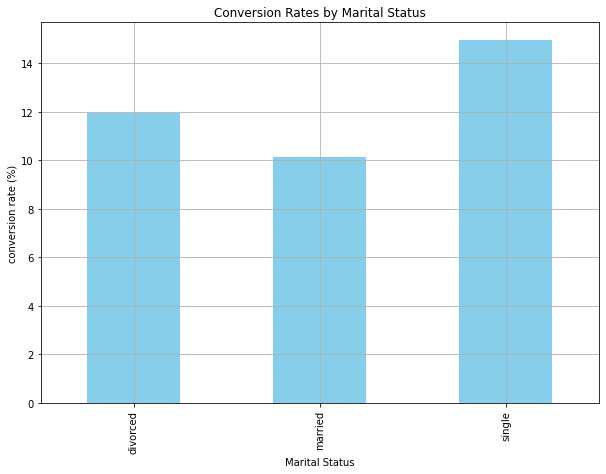

In [16]:
ax = conversion_rate_df_marital.plot(
    kind = 'bar',
    color = 'skyblue',
    grid = True,
    figsize = (10,7),
    title = 'Conversion Rates by Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()

###-Conversion Rates by Job

In [17]:
conversion_rate_by_job = df.groupby(
    by = 'job'
)['conversion'].sum() / df.groupby(
    by = 'job'
)['conversion'].count() * 100.0

In [18]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

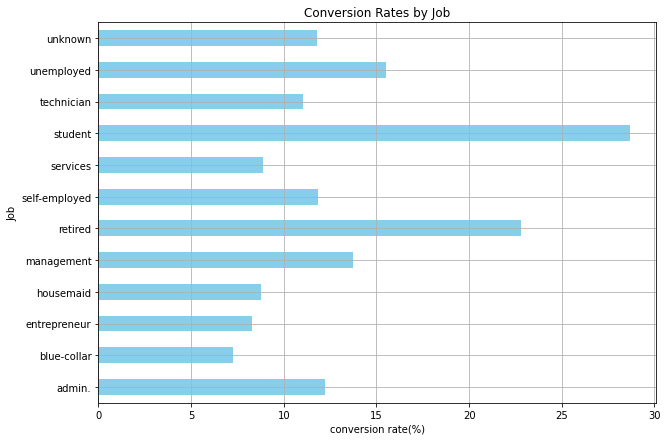

In [19]:
ax = conversion_rate_by_job.plot(
    kind = 'barh',
    color = 'skyblue',
    grid = True,
    figsize = (10,7),
    title = 'Conversion Rates by Job'
)

ax.set_xlabel('conversion rate(%)')
ax.set_ylabel('Job')

plt.show()

###-Default Rates by Conversions

In [24]:
default_by_conversion_df = pd.pivot_table(
    df,
    values = 'y',
    index = 'default',
    columns = 'conversion',
    aggfunc = len
)

In [21]:
default_by_conversion_df

conversion,0,1
default,,
no,39159,5237
yes,763,52


In [25]:
default_by_conversion_df.columns = ['non_conversions', 'conversions']

In [26]:
default_by_conversion_df

,non_conversions,conversions
default,,
no,39159,5237
yes,763,52


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35afed5490>,
      dtype=object)

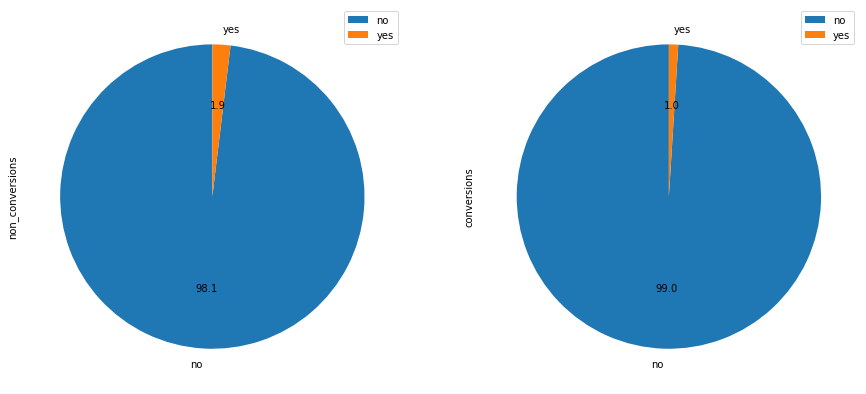

In [27]:
default_by_conversion_df.plot(
    kind = 'pie',
    figsize = (15,7),
    startangle = 90,
    subplots = True,
    autopct = lambda x : '%0.1f' % x
)

###-Bank Balance by Conversions

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NameError: ignored

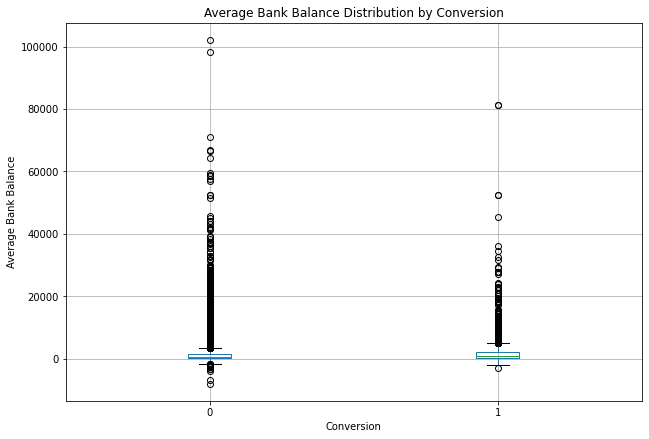

In [29]:
ax = df[['conversion', 'balance']].boxplot(
    by = 'conversion',
    showfliers = True,
    figsize = (10,7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distribution by Conversion')

plt.suptitle("")
plot.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


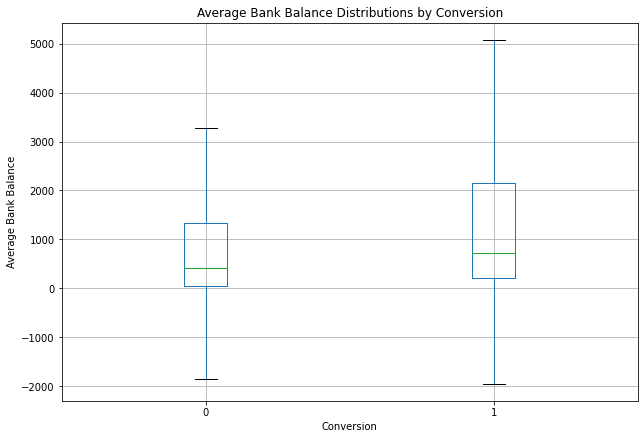

In [31]:
ax = df[['conversion','balance']].boxplot(
    by = 'conversion',
    showfliers = False,
    figsize = (10,7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

###-Conversions by Number of Contacts

In [32]:
conversions_by_num_contacts = df.groupby(
    by = 'campaign'
)['conversion'].sum() / df.groupby(
    by = 'campaign'
)['conversion'].count()*100

In [33]:
pd.DataFrame(conversions_by_num_contacts)

,conversion
campaign,
1,14.597583
2,11.203519
3,11.193624
4,9.000568
5,7.879819
6,7.126259
7,6.394558
8,5.925926
9,6.422018


In [35]:
df.groupby(
    by = 'campaign'
)['conversion'].sum()

campaign
1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
10      14
11      16
12       4
13       6
14       4
15       4
16       2
17       6
18       0
19       0
20       1
21       1
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       1
30       0
31       0
32       1
33       0
34       0
35       0
36       0
37       0
38       0
39       0
41       0
43       0
44       0
46       0
50       0
51       0
55       0
58       0
63       0
Name: conversion, dtype: int64

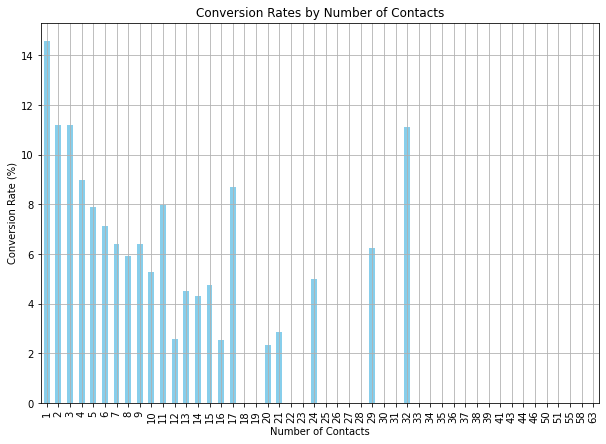

In [36]:
ax = conversions_by_num_contacts.plot(
    kind = 'bar',
    figsize = (10,7),
    title = 'Conversion Rates by Number of Contacts',
    grid = True,
    color = 'skyblue'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

#3. Encoding Categorical Variables

In [37]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

In [39]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,conversion
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [60]:
categorical_vars = [
      'job',
      'marital',
      'education',
      'default',
      'housing',
      'loan',
      'contact',
      'month'
]

In [61]:
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

###-encoding 'month'

In [62]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [63]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

df['month'] = df['month'].apply(
    lambda x: months.index(x) +1
)

In [64]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

###-encoding 'job'

In [65]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [66]:
jobs_encoded_df = pd.get_dummies(df['job'])
#더미 변수명 : 직업명 앞에 job_ 붙이기
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
df = pd.concat([df, jobs_encoded_df], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0,0,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0,0,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0,1,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0,0,1


###-encoding 'marital'

In [68]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [69]:
df = pd.concat([df, marital_encoded_df], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


###-encoding 'housing'

In [70]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [71]:
df['housing'] = df['housing'].apply(lambda x : 1 if x == 'yes' else 0)

###-encoding 'loan'

In [72]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [73]:
df['loan'] = df['loan'].apply(lambda x : 1 if x == 'yes' else 0)

#4. Fitting Decision Trees

In [80]:
features = [
            'age',
            'balance',
            'campaign',
            'previous',
            'housing'
] + list(jobs_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [81]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [76]:
from sklearn import tree

In [82]:
dt_model = tree.DecisionTreeClassifier(
    max_depth = 4
)

In [83]:
dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
dt_model.classes_

array([0, 1])

In [85]:
import numpy as np
result = dt_model.feature_importances_
print(result)

[0.22958146 0.03357839 0.01104479 0.30370049 0.39439427 0.
 0.00785975 0.         0.         0.         0.         0.00235943
 0.         0.         0.         0.         0.         0.0061807
 0.01130072 0.        ]


In [86]:
res = pd.DataFrame(result)
res['variable name'] = features
display(res.sort_values(by = 0, ascending =False))

,0,variable name
4,0.394394,housing
3,0.303700,previous
0,0.229581,age
1,0.033578,balance
18,0.011301,marital_married
2,0.011045,campaign
6,0.007860,job_blue-collar
17,0.006181,marital_divorced
11,0.002359,job_self-employed
13,0.000000,job_student


#5. Interpreting Decision Tree Model

In [87]:
import graphviz

In [89]:
dot_data = tree.export_graphviz(
    dt_model,
    out_file = None,
    feature_names = features,
    class_names = ['0', '1'],
    filled = True,
    rounded = True,
    special_characters = True
)

In [90]:
graph = graphviz.Source(dot_data)

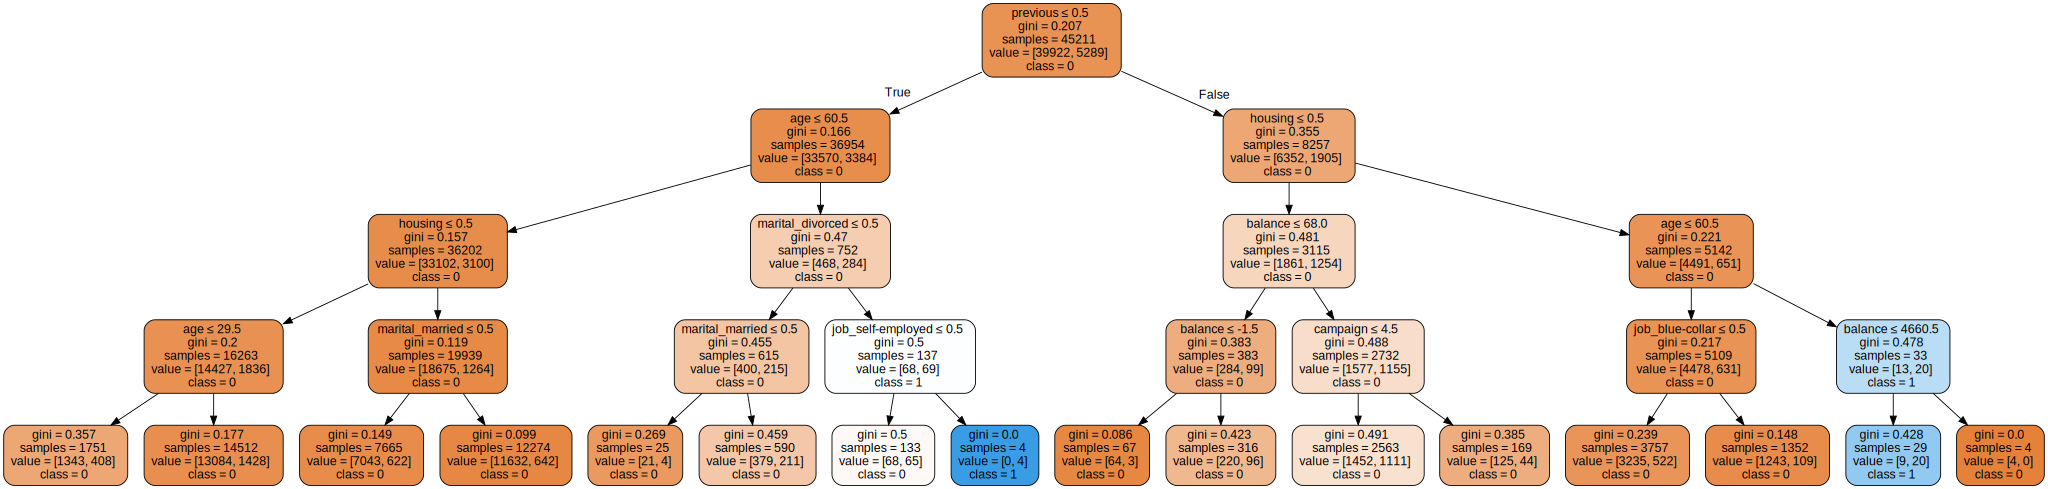

In [91]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))
graph

#Vs. Decision Tree for Predictio (Ch 8)

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[features], df[response_var], test_size = 0.2)

from sklearn import tree
dt_model = tree.DecisionTreeClassifier(
    class_weight = "balanced",
    max_depth = 4
)

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

train_preds = dt_model.predict(x_train)
test_preds = dt_model.predict(x_test)

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7964
           1       0.28      0.44      0.34      1079

    accuracy                           0.80      9043
   macro avg       0.60      0.64      0.61      9043
weighted avg       0.84      0.80      0.82      9043



In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    class_weight = "balanced",
    n_estimators = 200,
    max_depth = 5
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
train_preds = rf_model.predict(x_train)
test_preds = rf_model.predict(x_test)

print('[Train] Accuracy: %0.4f' % accuracy_score(y_train, train_preds))
print('[Test] Accuracy: %0.4f' % accuracy_score(y_test, test_preds))

print('[Train] Precision: %0.4f' % precision_score(y_train, train_preds))
print('[Test] Precision: %0.4f' % precision_score(y_test, test_preds))

print('[Train] Recall: %0.4f' % recall_score(y_train, train_preds))
print('[Test] Recall: %0.4f' % recall_score(y_test, test_preds))

[Train] Accuracy: 0.7353
[Test] Accuracy: 0.7376
[Train] Precision: 0.2406
[Test] Precision: 0.2463
[Train] Recall: 0.5910
[Test] Recall: 0.5820
